Import Libraries

In [39]:
from keras.utils import to_categorical
from keras_preprocessing.image import load_img
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

Import training and testing datasets

In [40]:
TRAIN_DIR = 'images/train'
TEST_DIR = 'images/test'

Create Dataframe(Train and Test)

In [41]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    print("Dataframe created")
    return image_paths,labels

train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)
print(train.head())

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed
Dataframe created
                          image  label
0      images/train\angry\0.jpg  angry
1      images/train\angry\1.jpg  angry
2     images/train\angry\10.jpg  angry
3  images/train\angry\10002.jpg  angry
4  images/train\angry\10016.jpg  angry


In [42]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)
print(test.head())

angry completed
disgust completed
fear completed
happy completed
neutral completed
sad completed
surprise completed
Dataframe created
                         image  label
0  images/test\angry\10052.jpg  angry
1  images/test\angry\10065.jpg  angry
2  images/test\angry\10079.jpg  angry
3  images/test\angry\10095.jpg  angry
4  images/test\angry\10121.jpg  angry


In [43]:
from tqdm.notebook import tqdm

def extract_features(images):
    features = []
    for image in tqdm(images):
        img = load_img(image,grayscale =  True )
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    features = features.reshape(len(features),48,48,1)
    return features

train_features = extract_features(train['image'])
test_features = extract_features(test['image'])

  0%|          | 0/28821 [00:00<?, ?it/s]

c:\Users\TahlilMahfuz\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras_preprocessing\image\utils.py:107: UserWarning: grayscale is deprecated. Please use color_mode = "grayscale"
  warnings.warn('grayscale is deprecated. Please use '


  0%|          | 0/7066 [00:00<?, ?it/s]

In [44]:
x_train = train_features/255.0
x_test = test_features/255.0

In [45]:
from sklearn.preprocessing import LabelEncoder

In [46]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [47]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [48]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [49]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy' )
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 10, validation_data = (x_test,y_test))

Epoch 1/10
  5/226 [..............................] - ETA: 3:30 - loss: 1.8916 - accuracy: 0.2078

KeyboardInterrupt: 

In [ ]:
model_json = model.to_json()
with open("emotiondetector.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector.h5")


In [58]:
from keras.models import model_from_json
import matplotlib.pyplot as plt
%matplotlib inline

In [53]:
json_file = open("facialemotionmodel.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("facialemotionmodel.h5")

label = ['angry','disgust','fear','happy','neutral','sad','surprise']


def ef(image):
    img = load_img(image,grayscale =  True )
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0

original image is of happy
1/1 [==============================] - 0s 23ms/step
model prediction is  happy


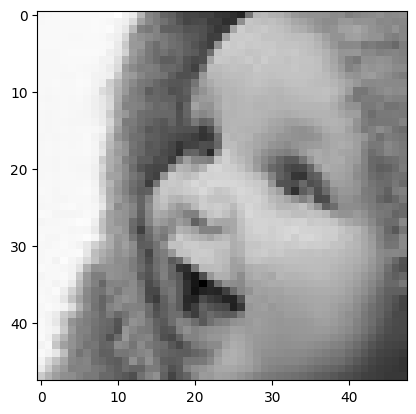

In [61]:
image = 'images/train/happy/64.jpg'
print("original image is of happy")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)
plt.imshow(img.reshape(48,48),cmap='gray')